In [2]:
from SMT_solver import SMT_solver
from SMT_Lib_utils import SMT_optimize
import time
from z3 import *
import numpy as np
import matplotlib.pyplot as plt
from func_timeout import func_timeout, FunctionTimedOut

plt.style.use('default')

import sys
sys.path.append("../common")
from utils import visualize, read_instance, save_solution, visualize_from_file


#reloads external modules when they are changed
%load_ext autoreload
%autoreload 2


# Try one instance

In [9]:
ins_filename = "../instances/ins-6.txt"
W, n, rectangles = read_instance(ins_filename)
break_symmetries = True
allow_rotation = False
verbose = True

solver = 'z3'

print("width: ", W)
print("number of rectangles: ", len(rectangles))
print("largest rectangle:", np.argmax([r.w * r.h for r in rectangles])+1)
print("break_symmetries:", break_symmetries)
print("")

try:
    start = time.time()
    H, positioned_rectangles = func_timeout(30, SMT_optimize, args=(W, rectangles, allow_rotation, verbose, break_symmetries), kwargs = {'solver': solver})
    execution_time = time.time() - start
    print(f"\nExecution time in seconds: {execution_time:.3f}")
except FunctionTimedOut:
    print("\n----Timeout----\n")


width:  13
number of rectangles:  9
largest rectangle: 9
break_symmetries: True

Finding optimal strip height.
Initial estimation:
13 <= H <= 23.

Trying lower bound first.
Rotation not allowed.
Lower bound is SAT.
Optimal value: H = 13.

Execution time in seconds: 0.033


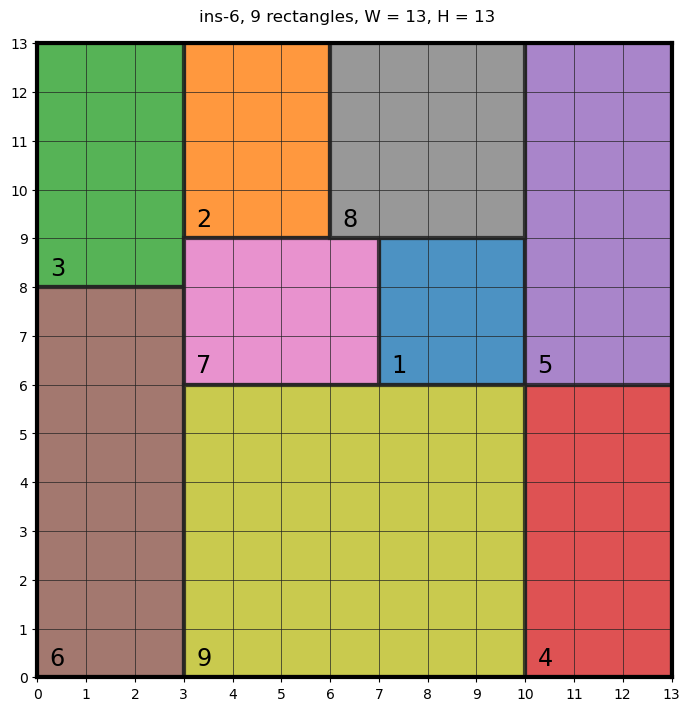

In [10]:
fig, ax = visualize(W, H, positioned_rectangles)
fig.suptitle(f"{ins_filename.split('/')[-1].split('.')[0]}, {n} rectangles, W = {W}, H = {H}")
fig.tight_layout(pad=1)
#plt.savefig("../" + ins_filename.split('.')[0])
plt.show()

# Compute All Instances

In [ ]:
save_to_file = False

output_folder = "out/LIA/"
input_folder = "../instances/"

plot = True

break_symmetries = False
allow_rotation = True

verbose = True

print("")
print(50*"=")
for i in range(20):
    ins_filename = input_folder + f"ins-{i+1}.txt"
    solution_filename = output_folder + f"ins-{i+1}-sol.txt"
    W, n, rectangles = read_instance(ins_filename)

    m = np.argmax([r.w * r.h for r in rectangles])
    print(f"\nInstance {i+1}")
    print("Width:", W)
    print("Number of rectangles:", len(rectangles))
    print("Largest rectangle measures:", (rectangles[m].w, rectangles[m].h))
    print("Largest rectangle index:", m+1)
    print("Breaking symmetries:", break_symmetries)
    print("")

    execution_time = 0.
    H = 0
    try:
        start = time.time()
        H, positioned_rectangles = func_timeout(150, SMT_optimize, args=(W, rectangles, allow_rotation, verbose, break_symmetries))
        execution_time = time.time() - start
        print("\nFound height:", H)
        print(f"Execution time in seconds: {execution_time:.3f}")

        if save_to_file:
            save_solution(solution_filename, W, H, positioned_rectangles)
            with open(solution_filename, "a") as f:
                f.write(f"\nexecution time in seconds: {execution_time:.3f}")
        if plot:
            w, h, dpi = 600, 600, 100
            fig, ax = plt.subplots(figsize=(w/dpi, h/dpi), dpi=dpi)

            fig, ax = visualize(W, H, positioned_rectangles, ax=ax)
            fig.suptitle(
                f"{ins_filename.split('/')[-1].split('.')[0]}, {n} rectangles, W = {W}, H = {H}")
            fig.tight_layout(pad=1)
            #plt.savefig("../" + ins_filename.split('.')[0])
            plt.show()

    except FunctionTimedOut:
        print("\n----Timeout----\n")

    print("")
    print(50*"=")
